In [1]:
from onetwogo import Params
from onetwogo.parallel_simulation import ParallelSimulation
from onetwogo.experiment_simulation import ExperimentSimulation
from onetwogo.plot import SimulationPlot
from onetwogo.plot import BehavioralPlot

import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pickle

import parameter_tuning as pt

%load_ext autoreload
%autoreload 2

In [2]:
sns.set_style("ticks", {'font.family':'sans-serif', 
               'font.sans-serif':['CMU Serif'],
               'size': 11})

In [3]:
import matplotlib as mpl
from matplotlib import rc

rc('text', usetex=True)
font = {'family':'CMU Serif', 
               #'sans-serif':['Helvetica'],
               'size': 11}
mpl.rc('font', **font)

In [4]:
colors_short = [(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.7972318339100346, 0.20092272202998845, 0.3008073817762399, 1.0),
 (0.9139561707035756, 0.36239907727797, 0.27935409457900806, 1.0),
 (0.9748558246828143, 0.5574009996155325, 0.32272202998846594, 1.0),
 (0.9934640522875817, 0.7477124183006535, 0.4352941176470587, 1.0),
 (0.9966935793925413, 0.8975009611687812, 0.5770857362552863, 1.0),
 (1.0, 0.9803921568627451, 0.5529411764705883, 1.0)]

colors_long = [(1.0, 0.9803921568627451, 0.5529411764705883, 1.0),
 (0.9173394848135333, 0.9669357939254134, 0.6200692041522493, 1.0),
 (0.7477124183006538, 0.8980392156862746, 0.6274509803921569, 1.0),
 (0.5273356401384084, 0.8106113033448674, 0.6452133794694349, 1.0),
 (0.3280276816608997, 0.6805074971164936, 0.6802768166089965, 1.0),
 (0.2265282583621684, 0.4938869665513264, 0.7224913494809688, 1.0),
 (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]

In [5]:
PARAMS_DICT = {'Wui': 6,
              'Wuv': 6,
              'Wvi': 6,
              'Wvu': 6,
              'dt': 10,
              'tau': 100,
              'th': 0.1,
              'IF': -500,
              'uinit': 0.7,
              'vinit': 0.2,
              'yinit': 0.5,
              'Iinit': 1.02,
              'first_duration': 750, 
              'sigma': 0.01, 
              'ntrials': 500,
              'delay': 500}

In [6]:
stimulus_range_s = [400, 450, 500, 550, 600, 650, 700]
stimulus_range_l = [700, 750, 800, 850, 900, 950, 1000]

In [7]:
stimulus_lst_short = np.loadtxt('stimlst_short_400_700_7_a.txt', dtype=int)
stimulus_lst_long = np.loadtxt('stimlst_long_700_1000_7_a.txt', dtype=int)

# CV

In [20]:
sigma_lst = [0,0.01,0.015,0.02,0.025,0.03,0.035,0.04,0.05,0.06]

In [21]:
import matplotlib as mpl
jet = cm = plt.get_cmap('Blues') 
cNorm  = mpl.colors.Normalize(vmin=-5, vmax=len(sigma_lst)-1)
scalarMap = mpl.cm.ScalarMappable(norm=cNorm, cmap=jet)

colors = []
for i in range(len(sigma_lst)):
    colors.append(scalarMap.to_rgba(i))

In [22]:
K = 8.5

stds_s_mean = []
for sigma in sigma_lst:
    stds_si = []
    for i in range(11):
        params = Params(ntrials=500, delay=700, tau=100, th=0.7, sigma = sigma)
        expsim = ExperimentSimulation(params)
        exp_result = expsim.simulate(stimulus_lst_short, K)
        beh_result = exp_result.create_behavioral_data()
        stds_si.append(beh_result.production_stds)
    print(sigma)
    stds_s_mean.append(np.nanmean(stds_si, axis=0))

0
0.01
0.015
0.02
0.025
0.03
0.035
0.04
0.05
0.06


In [23]:
K = 6
stds_l_mean = []

for sigma in sigma_lst:
    stds_li = []
    for i in range(11):
        params = Params(ntrials=500, delay=700, tau=100, th=0.7, sigma = sigma)
        expsim = ExperimentSimulation(params)
        exp_result = expsim.simulate(stimulus_lst_long, K)
        beh_result = exp_result.create_behavioral_data()
        stds_li.append(beh_result.production_stds)
    stds_l_mean.append(np.nanmean(stds_li, axis=0))

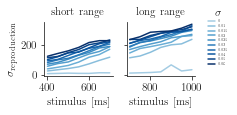

In [24]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(2.7,1))
ax[0].set_prop_cycle(color=colors)
ax[1].set_prop_cycle(color=colors)

for lst, sigma in zip(stds_s_mean, sigma_lst):
    ax[0].plot(stimulus_range_s, lst, label=str(sigma))
ax[0].set_title('short range', fontsize=11)
ax[0].set_ylabel(r'$\sigma_{\mathrm{reproduction}}$')
ax[0].set_xlabel('stimulus [ms]')
ax[1].set_xlabel('stimulus [ms]')

for lst, sigma in zip(stds_l_mean, sigma_lst):
    ax[1].plot(stimulus_range_l, lst, label=str(sigma))
ax[1].set_title('long range',  fontsize=11)

for i in [0,1]:
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

ax[1].legend(bbox_to_anchor=(1.15, 1.3), title=r'$\sigma$', frameon=False,  prop={'size': 3.4})

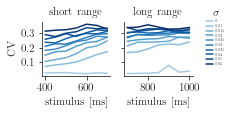

In [25]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(2.7,1))
ax[0].set_prop_cycle(color=colors)
ax[1].set_prop_cycle(color=colors)

for lst, sigma in zip(np.array(stds_s_mean)/np.array(stimulus_range_s), sigma_lst):
    ax[0].plot(stimulus_range_s, lst, label=str(sigma))
ax[0].set_title('short range', fontsize=11)
ax[0].set_ylabel(r'$\mathrm{CV}$')
ax[0].set_xlabel('stimulus [ms]')
ax[1].set_xlabel('stimulus [ms]')

for lst, sigma in zip(np.array(stds_l_mean)/np.array(stimulus_range_l), sigma_lst):
    ax[1].plot(stimulus_range_l, lst, label=str(sigma))
ax[1].set_title('long range', fontsize=11)

for i in [0,1]:
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

ax[1].legend(bbox_to_anchor=(1.15, 1.3), title=r'$\sigma$', frameon=False,  prop={'size': 3.4})

In [26]:
np.mean(np.array(stds_s_mean)/np.array(stimulus_range_s), axis=1)

array([0.0221595 , 0.11180646, 0.16648122, 0.20798466, 0.23358073,
       0.25332837, 0.27591297, 0.29429556, 0.31320114, 0.33591525])

In [27]:
np.mean(np.array(stds_l_mean)/np.array(stimulus_range_l), axis=1)

array([0.03210604, 0.20469254, 0.24473736, 0.26424769, 0.28990471,
       0.29669343, 0.31206937, 0.31534682, 0.32837976, 0.34169726])

In [20]:
(0.0978966+0.14479724)/2

0.12134692

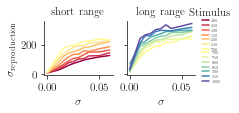

In [28]:
fig, ax = plt.subplots(1,2, sharey=True, sharex=True, figsize=(2.7,1))
ax[0].set_prop_cycle(color=colors_short)
ax[1].set_prop_cycle(color=colors_long)

for lst, stimulus in zip(np.array(stds_s_mean).T, stimulus_range_s):
    ax[0].plot(sigma_lst, lst, label=str(stimulus))
ax[0].set_title('short range', fontsize=11)
ax[0].set_ylabel(r'$\sigma_{\mathrm{reproduction}}$')
ax[0].set_xlabel(r'$\sigma$')
ax[1].set_xlabel(r'$\sigma$')

for lst, stimulus in zip(np.array(stds_l_mean).T, stimulus_range_l):
    ax[1].plot(sigma_lst, lst, label=str(stimulus))
ax[1].set_title('long range', fontsize=11)

for i in [0,1]:
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

ax[1].legend(bbox_to_anchor=(1.42, 0.5), frameon=False,  prop={'size': 3.4})
ax[0].legend(bbox_to_anchor=(2.77, 1.3), title='Stimulus',frameon=False,  prop={'size': 3.4})

timeouts: [(400, 0.0), (450, 0.0), (500, 0.0), (550, 0.0), (600, 0.0), (650, 0.04), (700, 0.03)]
0.830747032343457
timeouts: [(700, 0.0), (750, 0.0), (800, 0.03), (850, 0.03), (900, 0.01), (950, 0.0), (1000, 0.01)]
0.6345787619096386


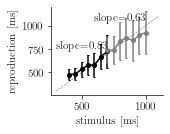

In [29]:
np.random.seed(0)
params = Params(ntrials=500, delay=700, tau=140, sigma=0.02, th=0.7)
expsim = ExperimentSimulation(params)

fig, ax = plt.subplots(1,1, figsize=(2.5,2))

K = 15
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

np.random.seed(0)
K = 10.5
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

ax.set(xlabel='stimulus [ms]', ylabel='reproduction [ms]')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

plt.tight_layout()

timeouts: [(400, 0.0), (450, 0.0), (500, 0.0), (550, 0.0), (600, 0.0), (650, 0.0), (700, 0.0)]
0.8294691128180514
timeouts: [(700, 0.0), (750, 0.0), (800, 0.0), (850, 0.0), (900, 0.0), (950, 0.0), (1000, 0.01)]
0.7303142652210977


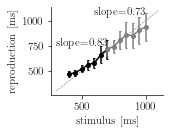

In [30]:
np.random.seed(0)
params = Params(ntrials=500, delay=700, tau=140, sigma=0.01, th=0.7)
expsim = ExperimentSimulation(params)

fig, ax = plt.subplots(1,1, figsize=(2.5,2))

K = 15
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

np.random.seed(0)
K = 10.5
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

ax.set(xlabel='stimulus [ms]', ylabel='reproduction [ms]')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

plt.tight_layout()